<a href="https://colab.research.google.com/github/PrathamUdayG/Machine_Learning_Algorithms_Project/blob/main/DBSCAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd

In [3]:
pd.set_option('display.max_columns',None)

In [4]:
df = pd.read_csv("/content/Wholesale customers data.csv")
df.head(10)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
5,2,3,9413,8259,5126,666,1795,1451
6,2,3,12126,3199,6975,480,3140,545
7,2,3,7579,4956,9426,1669,3321,2566
8,1,3,5963,3648,6192,425,1716,750
9,2,3,6006,11093,18881,1159,7425,2098


In [5]:
df.isnull().sum()

,0
Channel,0
Region,0
Fresh,0
Milk,0
Grocery,0
Frozen,0
Detergents_Paper,0
Delicassen,0


In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [20]:
df.shape

(440, 8)

In [9]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [10]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers_mask = ( df<lower_bound )| (df>upper_bound)
outliers_per_column = outliers_mask.sum()
print("Outliers per column are :")
print(outliers_per_column)

Outliers per column are :
Channel              0
Region               0
Fresh               20
Milk                28
Grocery             24
Frozen              43
Detergents_Paper    30
Delicassen          27
dtype: int64


In [12]:
df.skew()

,0
Channel,0.760951
Region,-1.283627
Fresh,2.561323
Milk,4.053755
Grocery,3.587429
Frozen,5.907986
Detergents_Paper,3.631851
Delicassen,11.151586


Create a scatter plot showing the realtion between Milk abd Grocery spending, colored by Channel Column

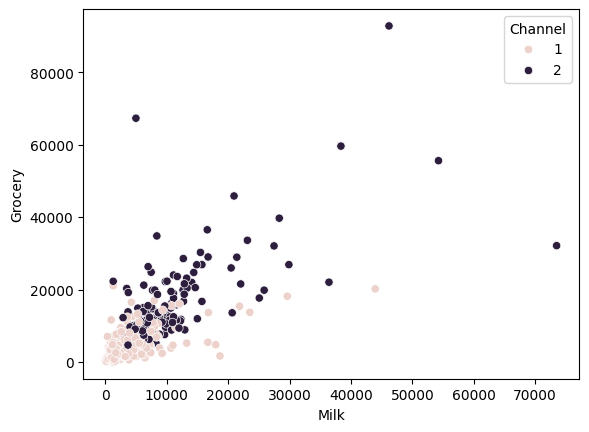

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(data=df, x = 'Milk' , y ='Grocery', hue= 'Channel')
plt.show()

In [13]:
# We need to scale our data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(df)
X_scaled

array([[ 1.44865163,  0.59066829,  0.05293319, ..., -0.58936716,
        -0.04356873, -0.06633906],
       [ 1.44865163,  0.59066829, -0.39130197, ..., -0.27013618,
         0.08640684,  0.08915105],
       [ 1.44865163,  0.59066829, -0.44702926, ..., -0.13753572,
         0.13323164,  2.24329255],
       ...,
       [ 1.44865163,  0.59066829,  0.20032554, ..., -0.54337975,
         2.51121768,  0.12145607],
       [-0.69029709,  0.59066829, -0.13538389, ..., -0.41944059,
        -0.56977032,  0.21304614],
       [-0.69029709,  0.59066829, -0.72930698, ..., -0.62009417,
        -0.50488752, -0.52286938]])

In [22]:
# Example of linspace
# Here I created 1 to 10 linspace with equal space
# LinearSpace will generate datapoints with equal space
arr = np.linspace(1,10,10)
print(arr)

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]


In [17]:
# Print 1 to 100 with 5 linspace
arr = np.linspace(1,100,5)
print(arr)

[  1.    25.75  50.5   75.25 100.  ]


In [18]:
from sklearn.cluster import DBSCAN

In [24]:
# min points : 2 * number of dimensions
# 2 * 8 = 16
min_points = 16

Epsilon value too small : Noise points are also covered.

Epsilon value too large : Outliers are also covered.

In [33]:
number_of_outlier = []
percentage_of_outlier = []

for x in np.linspace(0.001 , 3 , 50):
  db_model = DBSCAN(eps = x , min_samples = min_points)
  db_model.fit(X_scaled)

  out_count = np.sum(db_model.labels_==-1)
  number_of_outlier.append(out_count)

  perc_outliers = out_count/len(df) * 100 # out_count/len(db_model.labels_)*100
  percentage_of_outlier.append(perc_outliers)

In [34]:
print("For epsilon=",x,"percentage of outliers:",perc_outliers)

For epsilon= 3.0 percentage of outliers: 2.727272727272727


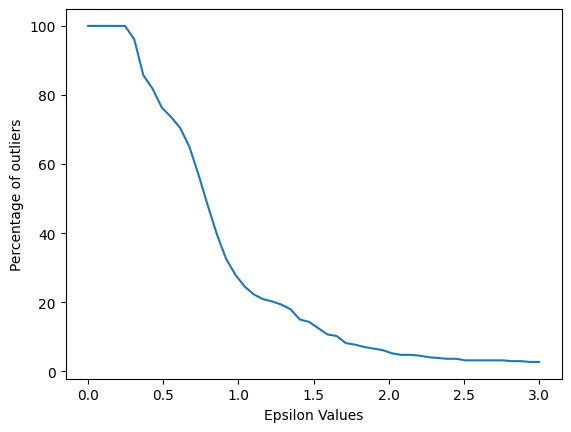

In [35]:
sns.lineplot(x=np.linspace(0.001 , 3 , 50),y=percentage_of_outlier)
plt.xlabel('Epsilon Values')
plt.ylabel('Percentage of outliers')
plt.show()
# From this below graph the optimum value of epsilon is 2.

In [37]:
dbscan_model = DBSCAN(eps = 2, min_samples=16)

In [38]:
dbscan_model.fit(X_scaled)

DBSCAN(eps=2, min_samples=16)

In [39]:
dbscan_model.labels_

array([ 0,  0,  0,  1,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  1,  0,
        1,  0,  1,  0,  1,  1, -1,  0,  0,  1,  1,  0,  1,  1,  1,  1,  1,
        1,  0,  1,  0,  0,  1,  1,  1,  0,  0,  0,  0,  0, -1,  0,  0,  1,
        1,  0,  0,  1,  1, -1,  0,  1,  1,  0, -1,  0,  0,  1, -1,  1,  0,
        1,  1,  1, -1,  1,  0,  0,  1,  1,  0,  1,  1,  1,  0,  0,  1,  0,
       -1, -1, -1,  1,  1,  1,  1, -1, -1,  0,  1,  0,  1,  1,  1,  0,  0,
        0, -1,  1,  1,  0,  0,  0,  0,  1,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  0,  1, -1,  1,  0,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  0,  0,  1,  0,  0,  0,  1,  1,  0,  0,  0,  0,  1,  1,  1,
        0, -1,  1,  0,  1,  0,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1,
        1,  0,  0,  1,  1,  1,  0,  1,  1, -1,  0,  1,  1,  0,  0,  1,  1,
        1,  0,  1,  0,  1,  0,  1, -1,  1,  1,  0,  1,  0,  1,  0,  1,  1,
        1,  1,  0,  1,  1

In [43]:
labels = dbscan_model.labels_

In [49]:
labels

array([ 0,  0,  0,  1,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  1,  0,
        1,  0,  1,  0,  1,  1, -1,  0,  0,  1,  1,  0,  1,  1,  1,  1,  1,
        1,  0,  1,  0,  0,  1,  1,  1,  0,  0,  0,  0,  0, -1,  0,  0,  1,
        1,  0,  0,  1,  1, -1,  0,  1,  1,  0, -1,  0,  0,  1, -1,  1,  0,
        1,  1,  1, -1,  1,  0,  0,  1,  1,  0,  1,  1,  1,  0,  0,  1,  0,
       -1, -1, -1,  1,  1,  1,  1, -1, -1,  0,  1,  0,  1,  1,  1,  0,  0,
        0, -1,  1,  1,  0,  0,  0,  0,  1,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  0,  1, -1,  1,  0,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  0,  0,  1,  0,  0,  0,  1,  1,  0,  0,  0,  0,  1,  1,  1,
        0, -1,  1,  0,  1,  0,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1,
        1,  0,  0,  1,  1,  1,  0,  1,  1, -1,  0,  1,  1,  0,  0,  1,  1,
        1,  0,  1,  0,  1,  0,  1, -1,  1,  1,  0,  1,  0,  1,  0,  1,  1,
        1,  1,  0,  1,  1

In [50]:
df['Labels'] = labels

In [51]:
# Now fetching all the ouliers
df[df['Labels']==-1]

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Labels
23,2,3,26373,36423,22019,5154,4337,16523,-1
47,2,3,44466,54259,55571,7782,24171,6465,-1
56,2,3,4098,29892,26866,2616,17740,1340,-1
61,2,3,35942,38369,59598,3254,26701,2017,-1
65,2,3,85,20959,45828,36,24231,1423,-1
71,1,3,18291,1266,21042,5373,4173,14472,-1
85,2,3,16117,46197,92780,1026,40827,2944,-1
86,2,3,22925,73498,32114,987,20070,903,-1
87,1,3,43265,5025,8117,6312,1579,14351,-1
92,2,3,9198,27472,32034,3232,18906,5130,-1


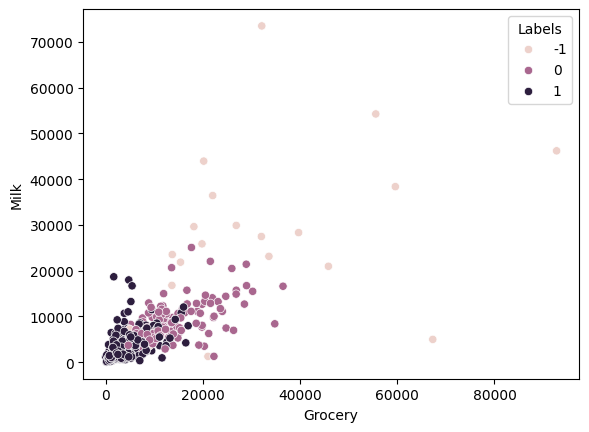

In [52]:
sns.scatterplot(data=df, x = 'Grocery', y='Milk',hue='Labels')
plt.show()